In [ ]:
import torch
import pickle
from PIL import Image
from torchvision import transforms
import torch.nn.functional as F

# تحميل النموذج
model_name = "image_classifier8"
with open(f"./modelsendd/{model_name}.pkl", "rb") as file:
    model = pickle.load(file)

model.eval()  # وضع التقييم

# تجهيز تحويل الصورة    
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

def predict_image(image):  # استبدل image_path بـ image مباشرة
    # ✅ تأكد أن الصورة بتنسيق RGB
    image = image.convert("RGB")

    # ✅ تطبيق التحويلات وإرسال الصورة للنموذج
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image = transform(image).unsqueeze(0).to(device)  # تأكد أن `transform` معرف لديك

    # ✅ الحصول على النتيجة
    output = model(image)
    probabilities = F.softmax(output, dim=1)  # تحويل القيم إلى احتمالات
    confidence, predicted = torch.max(probabilities, 1)  # الحصول على النتيجة الأعلى

    # ✅ إرجاع النتيجة
    confidence_percentage = confidence.item() * 100
    classification = "Decent" if predicted.item() == 0 else "Indecent"
    return {"classification": classification, "confidence_percentage": confidence_percentage}


In [ ]:
import os
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# مسار المجلد الرئيسي اللي فيه كل الفئات
base_dir = "./test_images"

# الخرائط بين اسم المجلد و رقم التصنيف
label_map = {
    "Decent": 0,
    "Indecent": 1
}

y_true = []
y_pred = []

for folder_name, label in label_map.items():
    folder_path = os.path.join(base_dir, folder_name)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            image = Image.open(file_path)
            result = predict_image(image)
            predicted_label = 0 if result["classification"] == "Decent" else 1

            y_true.append(label)
            y_pred.append(predicted_label)
        except Exception as e:
            print(f"خطأ في {file_name}: {e}")


📊 دقة النموذج: 92.12%

📋 Classification Report:
              precision    recall  f1-score   support

       لائقة       0.94      0.90      0.92       121
   غير لائقة       0.90      0.94      0.92       120

    accuracy                           0.92       241
   macro avg       0.92      0.92      0.92       241
weighted avg       0.92      0.92      0.92       241



C:\Users\alial\AppData\Local\Temp\ipykernel_18044\995707228.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig(f"التصنيف/{model_name}_classfir.png")
C:\Users\alial\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


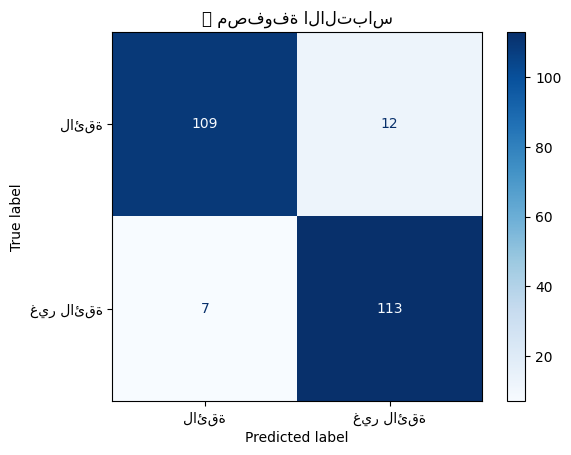

C:\Users\alial\AppData\Local\Temp\ipykernel_18044\995707228.py:26: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig(f"التصنيف/{model_name}_data_size.png")
C:\Users\alial\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


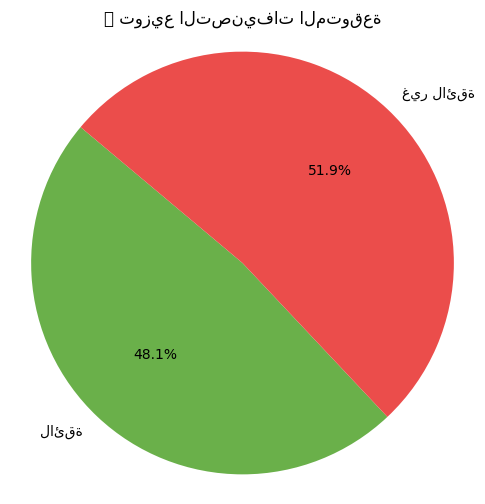

In [ ]:
# دقة النموذج
accuracy = accuracy_score(y_true, y_pred)
print(f"📊 دقة النموذج: {accuracy * 100:.2f}%")

# تقرير تفصيلي
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["لائقة", "غير لائقة"]))

# مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["لائقة", "غير لائقة"])
disp.plot(cmap="Blues")
plt.title("🔍 مصفوفة الالتباس")
plt.savefig(f"التصنيف/{model_name}_classfir.png")
plt.show()

# رسم Pie Chart
counts = Counter(y_pred)
sizes = [counts[0], counts[1]]
labels_pie = ["لائقة", "غير لائقة"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels_pie, autopct='%1.1f%%', startangle=140, colors=["#6AB04A", "#EB4D4B"])
plt.title("🔎 توزيع التصنيفات المتوقعة")
plt.axis('equal')
plt.savefig(f"التصنيف/{model_name}_data_size.png")
plt.show()


C:\Users\alial\AppData\Local\Temp\ipykernel_18044\2788138836.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\alial\AppData\Local\Temp\ipykernel_18044\2788138836.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(f"التصنيف/{model_name}_Metrics.png")
C:\Users\alial\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


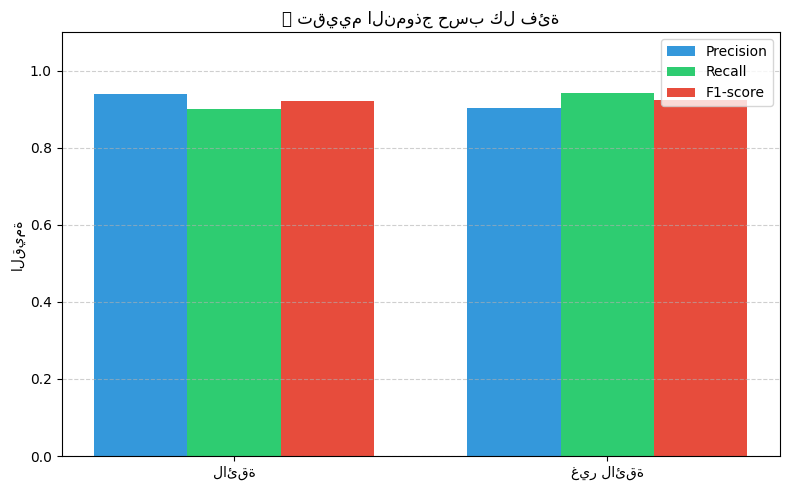

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# توليد القيم من التقرير
report = classification_report(y_true, y_pred, target_names=["لائقة", "غير لائقة"], output_dict=True)

labels = ["لائقة", "غير لائقة"]
precision = [report[label]["precision"] for label in labels]
recall = [report[label]["recall"] for label in labels]
f1_score = [report[label]["f1-score"] for label in labels]

x = np.arange(len(labels))
width = 0.25

# رسم الأعمدة
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width, precision, width, label="Precision", color="#3498DB")
rects2 = ax.bar(x, recall, width, label="Recall", color="#2ECC71")
rects3 = ax.bar(x + width, f1_score, width, label="F1-score", color="#E74C3C")

# إعدادات الرسم
ax.set_ylabel("القيمة")
ax.set_title("📊 تقييم النموذج حسب كل فئة")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# عرض الرسم
plt.tight_layout()
plt.savefig(f"التصنيف/{model_name}_Metrics.png")
plt.show()
